## House Price EDA and predicting the house prices
- Introduction
- Importing the libraries
- Reading the datasets(test and train datasets)
- Checking the datatypes(converting to categorical dtypes)
- Missing value treatments(for avoiding errors in plot visulizations)
- Correaltion matrix
- Data viz and EDA 
- pair plot
- XGboost
- Statical analysis
- House price model

In [34]:
#_Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [35]:
#_Reading the datasets

df = pd.read_csv('PEP1.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [36]:
df_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [37]:
#_Reading the column type
df_train.select_dtypes("int").columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [38]:
#_Reading the column type
df_train.select_dtypes("float").columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [39]:
#_Reading the column type
df_train.select_dtypes("object").columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [40]:
#Converting object data type to category
df_train[df_train.select_dtypes("object").columns] = df_train.select_dtypes("object").astype("category")
df_train.select_dtypes("category").columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
#_Checking the datasets
df_train.info(verbose= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: category(43), float64(3), int64(35)
memory usage: 505.4 KB


In [42]:
#Selecting important attributes
cols_sum_stat = [
    "LotFrontage",
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "GrLivArea",
    "BsmtFullBath",
    "FullBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "SalePrice",
]

df_train[cols_sum_stat].describe().round()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1201.0,1460.0,1452.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,70.0,10517.0,104.0,1057.0,1163.0,347.0,1515.0,0.0,2.0,3.0,1.0,473.0,94.0,47.0,180921.0
std,24.0,9981.0,181.0,439.0,387.0,437.0,525.0,1.0,1.0,1.0,0.0,214.0,125.0,66.0,79443.0
min,21.0,1300.0,0.0,0.0,334.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34900.0
25%,59.0,7554.0,0.0,796.0,882.0,0.0,1130.0,0.0,1.0,2.0,1.0,334.0,0.0,0.0,129975.0
50%,69.0,9478.0,0.0,992.0,1087.0,0.0,1464.0,0.0,2.0,3.0,1.0,480.0,0.0,25.0,163000.0
75%,80.0,11602.0,166.0,1298.0,1391.0,728.0,1777.0,1.0,2.0,3.0,1.0,576.0,168.0,68.0,214000.0
max,313.0,215245.0,1600.0,6110.0,4692.0,2065.0,5642.0,3.0,3.0,8.0,3.0,1418.0,857.0,547.0,755000.0


## Missing value treatment

In [43]:
#Missing value treatment
clean_house = df_train.isna().sum().to_frame().reset_index()
clean_house = clean_house.rename(
    columns={"index": "variable_name", 0: "total_na"}
)
clean_house = (
    clean_house.query("total_na > 0")
    .copy()
    .sort_values(by="total_na", ascending=False)
).copy()

clean_house.nlargest(columns="total_na", n=5)


,variable_name,total_na
72,PoolQC,1453
74,MiscFeature,1406
6,Alley,1369
73,Fence,1179
57,FireplaceQu,690


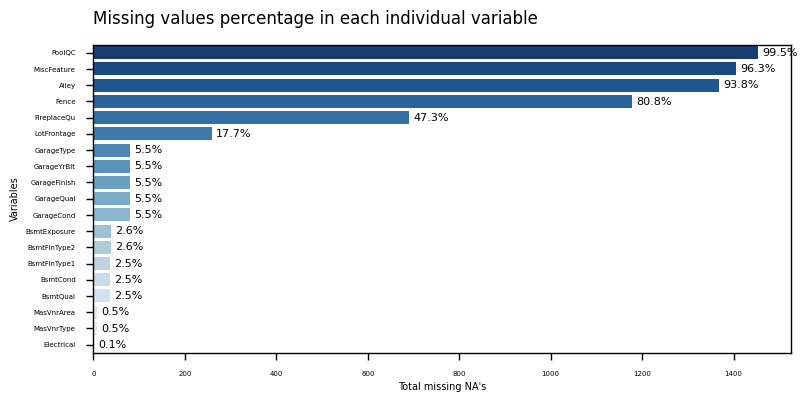

In [44]:
#_Checking the missing value distributions
fig, ax = plt.subplots(figsize = (9,4))

sns.barplot(
    data = clean_house,
    x = "total_na",
    y = "variable_name",
    palette= "Blues_r",
    orient= "h",
)

values = ax.containers[0].datavalues
labels = ["{:0.1f}%".format(val) for val in values /1460 *100]
ax.bar_label(ax.containers[0], labels=labels, size = 8, padding=3)
ax.set_title(
    "Missing values percentage in each individual variable",
    fontsize = 12,
    loc = "left",
    pad = 15,
)
ax.tick_params(axis = "x", labelsize=5, pad=8)
ax.tick_params(axis = "y", labelsize=5, pad=8)
ax.set_xlabel("Total missing NA's", fontsize = 7)
ax.set_ylabel("Variables", fontsize =7)

plt.show()


We are going to remove coloumns which has higher missing values percentage ehich is more than 50

In [45]:
#_droping the missing values from the dataset
clean_house_morethan_50 = (
    clean_house.query("total_na > 700").variable_name.copy().to_list()
)
clean_house_morethan_50

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [46]:
#_droping the missing values from the dataset
house = df_train.drop(clean_house_morethan_50, axis=1)

In [47]:
#_Checking the dataset
df_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: category(43), float64(3), int64(35)
memory usage: 505.4 KB


In [48]:
#_Corealtion matrix
df_train.head(20).style.background_gradient(cmap = "flare")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,nan,Attchd,1993.000000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,nan,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,nan,nan,nan,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,nan,nan,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,nan,nan,nan,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,nan,Reg,Lvl,AllPub,Corner,Gtl,B

<AxesSubplot: >

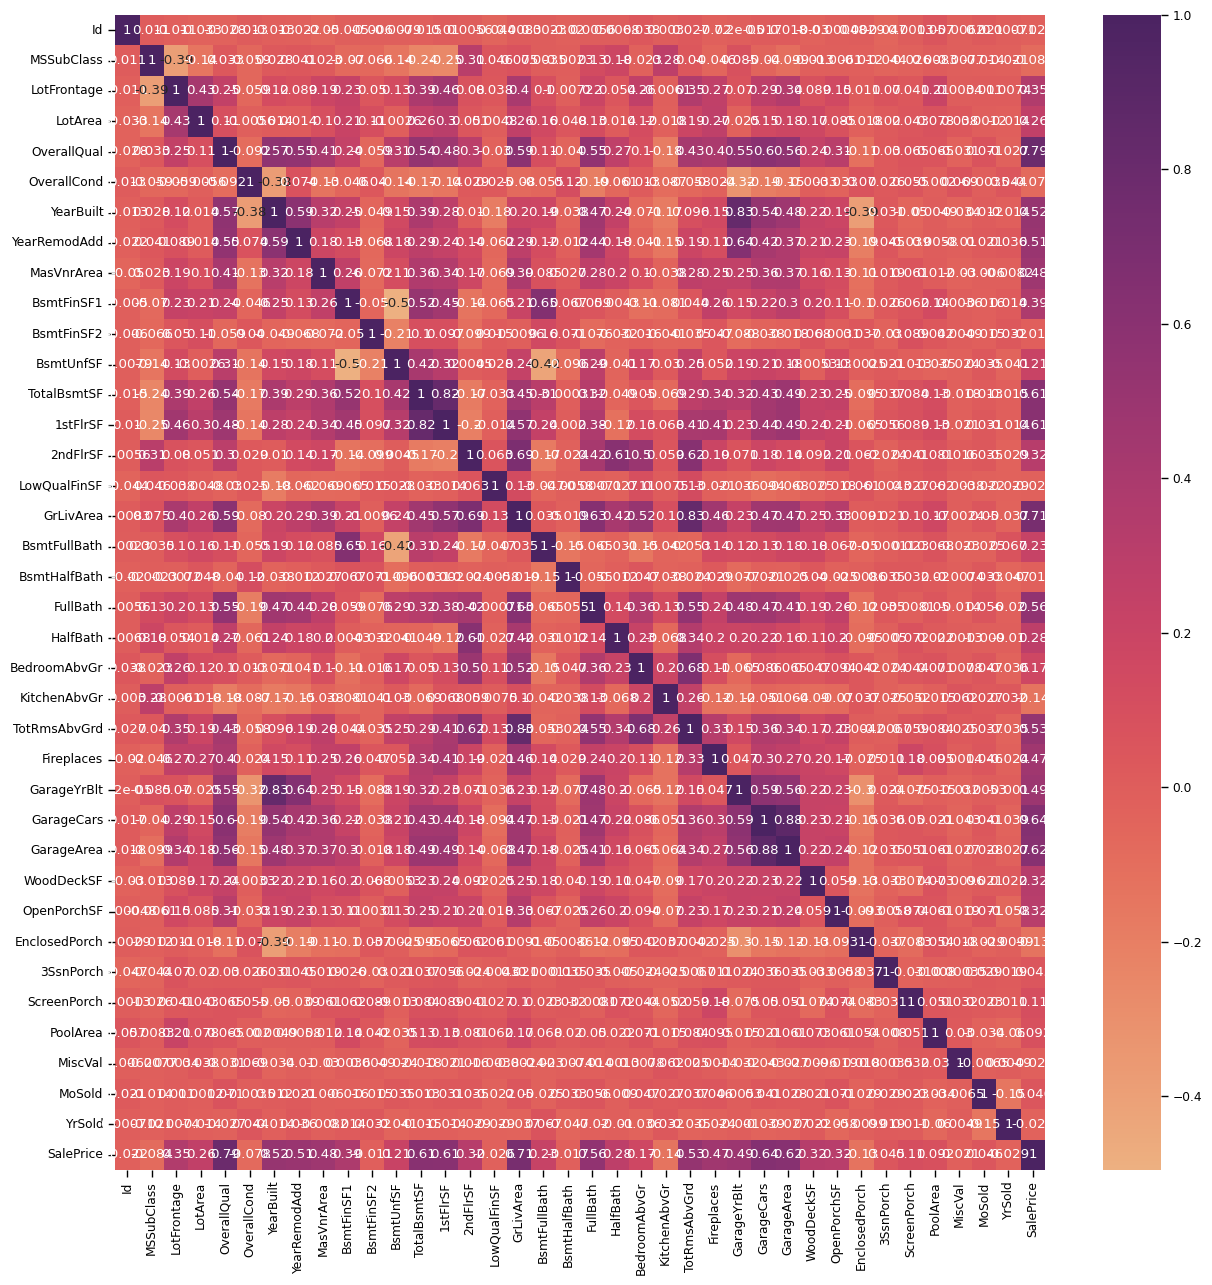

In [49]:
#_Corealtion matrix
plt.figure(figsize=(15, 15))
sns.heatmap(house.corr(), annot = True, cmap="flare")

Since, the correaltion matrix looks overcrowded we are eliminating some attributes which are not directly realted to the saleprice of the house.

In [50]:
#Correaltion_matrix
remove_house = [
    "Id",
    "MSSubClass",
    "OverallCond",
    "Fireplaces",
    "PoolArea",
    "MiscVal",
    "MoSold",
    "YrSold",
    "BsmtHalfBath",
    "BsmtFinSF2",
    "LowQualFinSF",
    "EnclosedPorch",
]

In [51]:
#Corealtion_matrix
corr_mat = (
    house.loc[:, ~house.columns.isin(remove_house)]
    .select_dtypes("int64")
    .corr()
)
corr_mat[["SalePrice"]].sort_values("SalePrice",ascending = False).style.format(precision =3).background_gradient(cmap = "flare")

,SalePrice
SalePrice,1.000
OverallQual,0.791
GrLivArea,0.709
GarageCars,0.640
GarageArea,0.623
TotalBsmtSF,0.614
1stFlrSF,0.606
FullBath,0.561
TotRmsAbvGrd,0.534
YearBuilt,0.523


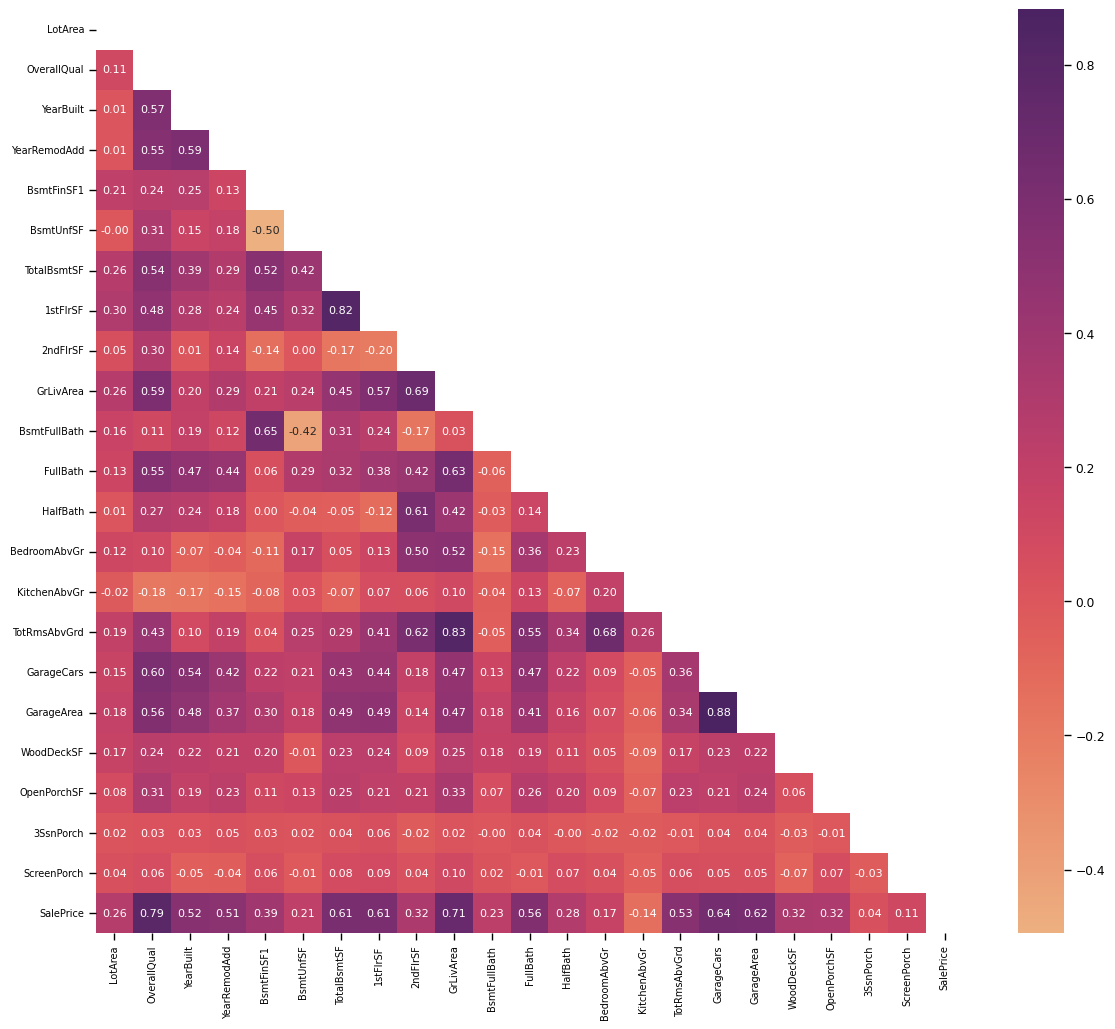

In [52]:
#correaktion matrix
mask = np.triu(np.ones_like(corr_mat.corr()))
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(
    corr_mat,
    square=False,
    cmap="flare",
    mask=mask,
    annot=True,
    annot_kws={"size": 8},
    fmt=".2f",
)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

## Feauture enginnering
- Total square feet
- Toatal number of bathrooms
- House age
- Close neighbourhoods

In [53]:
#Total square feet
df_train["Total_Square_Feet"] = (
    df_train["GrLivArea"] + df_train["TotalBsmtSF"]
)
df_train["Total_Square_Feet"]

0       2566
1       2524
2       2706
3       2473
4       3343
        ... 
1455    2600
1456    3615
1457    3492
1458    2156
1459    2512
Name: Total_Square_Feet, Length: 1460, dtype: int64

In [54]:
#Total number of bathrooms
df_train["Total_number_of_Bathrooms"] = (
    df_train["FullBath"]
    + (df_train["HalfBath"])
    + df_train["BsmtFullBath"]
    + (df_train["BsmtHalfBath"])
)

df_train["Total_number_of_Bathrooms"].describe().round()

count    1460.0
mean        2.0
std         1.0
min         1.0
25%         2.0
50%         2.0
75%         3.0
max         6.0
Name: Total_number_of_Bathrooms, dtype: float64

In [55]:
#_House Age
df_train["House_Age"] = df_train["YrSold"] - df_train["YearBuilt"]

df_train["House_Age_YearRemodAdd"] = (
    df_train["YrSold"] - df_train["YearRemodAdd"]
)

df_train[["House_Age"]].describe().round(), df_train[
    ["House_Age_YearRemodAdd"]
].describe().round()

(       House_Age
 count     1460.0
 mean        37.0
 std         30.0
 min          0.0
 25%          8.0
 50%         35.0
 75%         54.0
 max        136.0,
        House_Age_YearRemodAdd
 count                  1460.0
 mean                     23.0
 std                      21.0
 min                      -1.0
 25%                       4.0
 50%                      14.0
 75%                      41.0
 max                      60.0)

In [56]:
#_House_Age
df_train[df_train["House_Age"] == 0].loc[
    :, ["YearBuilt", "YearRemodAdd", "YrSold", "House_Age", "House_Age_YearRemodAdd"]
].sort_values("House_Age_YearRemodAdd").head()

,YearBuilt,YearRemodAdd,YrSold,House_Age,House_Age_YearRemodAdd
523,2007,2008,2007,0,-1
58,2006,2006,2006,0,0
765,2008,2008,2008,0,0
793,2007,2007,2007,0,0
805,2008,2008,2008,0,0


In [57]:
#_Top_neighborhood
top_5_Neighborhood = [
    "Edwards",
    "NridgHt",
    "NoRidge",
    "OldTown",
    "CollgCr"
]

In [58]:
df_train["Neighborhood"] = np.where(
    df_train["Neighborhood"].isin(top_5_Neighborhood),
    df_train["Neighborhood"],
    "Other",
)

## Analyzing the target variable i.e..,"Sale_price"

In [59]:
#Target variable analysis
df_train[["SalePrice"]].describe().round()

,SalePrice
count,1460.0
mean,180921.0
std,79443.0
min,34900.0
25%,129975.0
50%,163000.0
75%,214000.0
max,755000.0


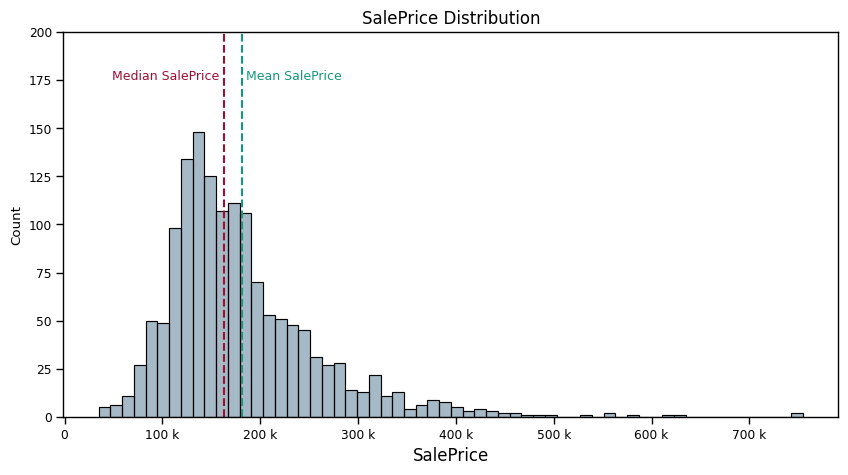

In [60]:
#target variable analysis
mean_SalePrice = df_train[["SalePrice"]].mean().squeeze()
median_SalePrice = df_train[["SalePrice"]].median().squeeze()

plt.figure(figsize=(10, 5))
sns.set_context("paper")

histplt = sns.histplot(
    data=df_train,
    x="SalePrice",
    color="#4f758f",
    bins=60,
    alpha=0.5,
    lw=2,
)
histplt.set_title("SalePrice Distribution", fontsize=12)
histplt.set_xlabel("SalePrice", fontsize=12)

plt.axvline(x=mean_SalePrice, color="#14967f", ls="--", lw=1.5)
plt.axvline(x=median_SalePrice, color="#9b0f33", ls="--", lw=1.5)
plt.text(mean_SalePrice + 5000, 175, "Mean SalePrice", fontsize=9, color="#14967f")
plt.text(
    median_SalePrice - 115000, 175, "Median SalePrice", fontsize=9, color="#9b0f33"
)
histplt.xaxis.set_major_formatter(ticker.EngFormatter())
plt.ylim(0, 200)
plt.show()

In [61]:
df_train["SalePriceLog"] = np.log(df_train["SalePrice"])
df_train["GrLivAreaLog"] = np.log(df_train["GrLivArea"])
df_train["LotAreaLog"] = np.log(df_train["LotArea"])
df_train[
    ["SalePrice", "SalePriceLog", "GrLivArea", "GrLivAreaLog", "LotArea", "LotAreaLog"]
]

,SalePrice,SalePriceLog,GrLivArea,GrLivAreaLog,LotArea,LotAreaLog
0,208500,12.247694,1710,7.444249,8450,9.041922
1,181500,12.109011,1262,7.140453,9600,9.169518
2,223500,12.317167,1786,7.487734,11250,9.328123
3,140000,11.849398,1717,7.448334,9550,9.164296
4,250000,12.429216,2198,7.695303,14260,9.565214
...,...,...,...,...,...,...
1455,175000,12.072541,1647,7.406711,7917,8.976768
1456,210000,12.254863,2073,7.636752,13175,9.486076
1457,266500,12.493130,2340,7.757906,9042,9.109636
1458,142125,11.864462,1078,6.982863,9717,9.181632


The above code is to use log transformation that is to see the difference in the two distributions.
first we are going to build a function!

In [62]:
def prob_plot(tq_var1, tq_var2):

    plt.subplot(2, 2, 1)
    tq_var1_hist = sns.histplot(
        df_train[tq_var1], kde=True, color="#03396c", line_kws={"lw": 2}
    )
    tq_var1_hist.xaxis.set_major_formatter(ticker.EngFormatter())
    tq_var1_hist.set_title("(" + tq_var1 + ") " + "Distributions", fontsize=10)
    ######################
    ax = plt.subplot(2, 2, 2)
    stats.probplot(df_train[tq_var1], plot=plt)
    ax.get_lines()[0].set_marker("o")
    ax.get_lines()[0].set_markerfacecolor("#343d46")
    ax.get_lines()[0].set_markeredgecolor("#343d46")
    ax.get_lines()[0].set_markersize(5.0)
    ax.get_lines()[1].set_color("#f01c58")
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    ax.set_title("Probability Plot " + "(" + tq_var1 + ")", fontsize=10)
    #####################
    plt.subplot(2, 2, 3)
    tq_var1_hist = sns.histplot(
        df_train[tq_var2], kde=True, color="#03396c", line_kws={"lw": 2}
    )
    tq_var1_hist.xaxis.set_major_formatter(ticker.EngFormatter())
    tq_var1_hist.set_title("(" + tq_var2 + ") " + "Distributions", fontsize=10)
    #####################
    ax = plt.subplot(2, 2, 4)
    stats.probplot(df_train[tq_var2], plot=plt)
    ax.get_lines()[0].set_marker("o")
    ax.get_lines()[0].set_markerfacecolor("#343d46")
    ax.get_lines()[0].set_markeredgecolor("#343d46")
    ax.get_lines()[0].set_markersize(5.0)
    ax.get_lines()[1].set_linewidth(3.0)
    ax.get_lines()[1].set_color("#f01c58")
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    ax.set_title("Probability Plot " + "(" + tq_var2 + ")", fontsize=10)

    plt.tight_layout(pad=1)
    shapiro_test_tq_var1 = stats.shapiro(df_train[tq_var1])
    shapiro_test_tq_var2 = stats.shapiro(df_train[tq_var2])
    return print("(" + tq_var1 + ")--->", shapiro_test_tq_var1), print(
        "(" + tq_var2 + ")--->", shapiro_test_tq_var2
    )

(SalePrice)---> ShapiroResult(statistic=0.869672954082489, pvalue=3.2072044604461286e-33)
(SalePriceLog)---> ShapiroResult(statistic=0.9912080764770508, pvalue=1.1514231346154702e-07)


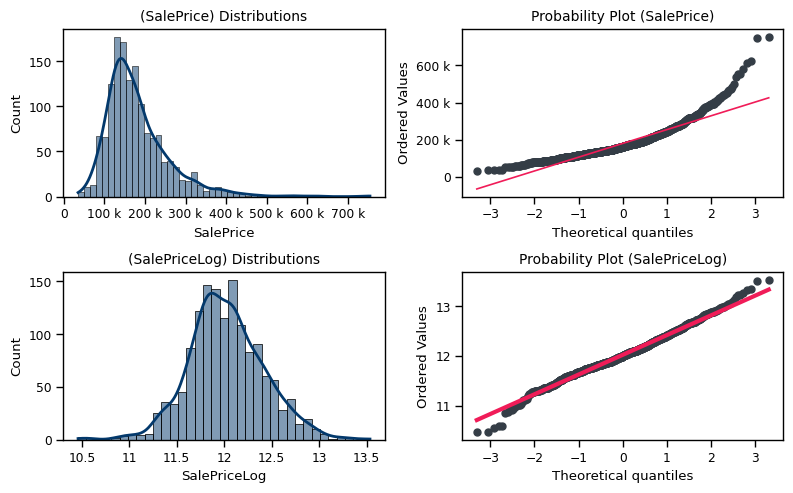

In [63]:
#comp_1 Normality between saleprice and salepriceLOG
plt.figure(figsize=(8, 5))
prob_plot("SalePrice", "SalePriceLog")
plt.show()

(SalePrice)---> ShapiroResult(statistic=0.869672954082489, pvalue=3.2072044604461286e-33)
(GrLivArea)---> ShapiroResult(statistic=0.927983283996582, pvalue=6.59922021670945e-26)


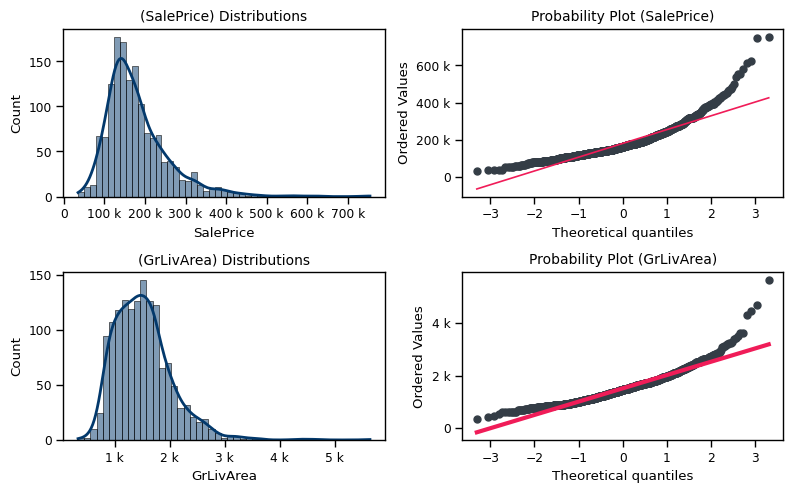

In [64]:
#normality between GRLIVarea and sale price
plt.figure(figsize=(8,5))
prob_plot("SalePrice", "GrLivArea")
plt.show()

(GrLivArea)---> ShapiroResult(statistic=0.927983283996582, pvalue=6.59922021670945e-26)
(GrLivAreaLog)---> ShapiroResult(statistic=0.9960911273956299, pvalue=0.000858238257933408)


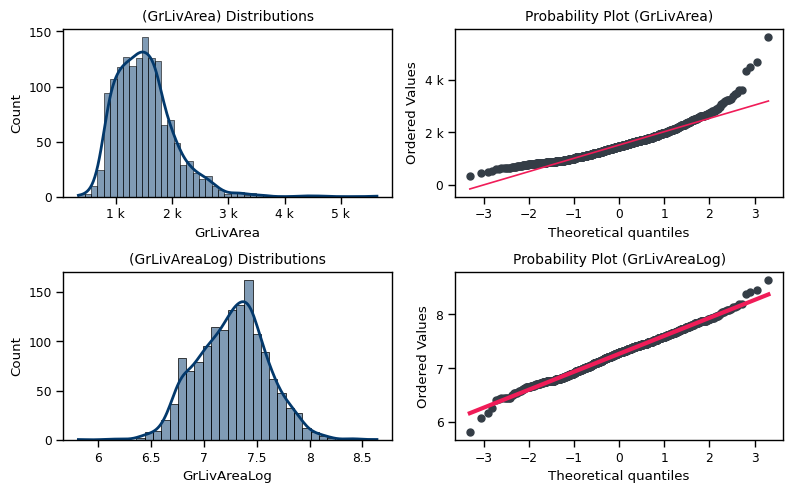

In [65]:
#normality between Grlivarea and GrlivareaLog
plt.figure(figsize=(8,5))
prob_plot("GrLivArea", "GrLivAreaLog")
plt.show()

In [66]:
#PLoting for numerical values
date_var = ["YearRemodAdd", "YearBuilt", "YrSold", "MoSold"]
def to_plot(df, x_var, y_var, hue_var=None, palette_set=None):

    if pd.api.types.is_numeric_dtype(df[x_var]):
        if hue_var is None or palette_set is None:
            lmplt = sns.lmplot(
                data=df,
                x=x_var,
                y=y_var,
                ci=0,
                height=5,
                aspect=1.8,
                legend=False,
                # hue=hue_var,
                # palette=palette_set,
                line_kws={"lw": 2, "linestyle": "--", "alpha": 0.8},
                scatter_kws={"marker": "o", "s": 20, "alpha": 0.7},
            )

            lmplt.set_xlabels(x_var, fontsize=14)
            lmplt.set_ylabels(y_var, fontsize=14)
            lmplt.set_titles("Sale Price by " + str(x_var), fontsize=16)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
            # plt.legend().set_visible(False)

            if x_var in date_var:
                for ax in lmplt.axes.flat:
                    ax.yaxis.set_major_formatter(ticker.EngFormatter())
                    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
            else:
                for ax in lmplt.axes.flat:
                    ax.yaxis.set_major_formatter(ticker.EngFormatter())
                    ax.xaxis.set_major_formatter(ticker.EngFormatter())

        else:
            lmplt = sns.lmplot(
                data=df,
                x=x_var,
                y=y_var,
                ci=0,
                height=5,
                aspect=1.8,
                legend=False,
                hue=hue_var,
                palette=palette_set,
                line_kws={"lw": 2, "linestyle": "--", "alpha": 0.8},
                scatter_kws={"marker": "o", "s": 20, "alpha": 0.7},
            )

            lmplt.set_xlabels(x_var, fontsize=14)
            lmplt.set_ylabels(y_var, fontsize=14)
            lmplt.set_titles("Sale Price by " + str(x_var), fontsize=16)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
            plt.legend(fontsize=10, title=hue_var, title_fontsize=10)

            if x_var in date_var:
                for ax in lmplt.axes.flat:
                    ax.yaxis.set_major_formatter(ticker.EngFormatter())
                    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
            else:
                for ax in lmplt.axes.flat:
                    ax.yaxis.set_major_formatter(ticker.EngFormatter())
                    ax.xaxis.set_major_formatter(ticker.EngFormatter())

    elif pd.api.types.is_categorical_dtype(df[x_var]):

        plt.figure(figsize=(10, 5))
        bxplt = sns.boxplot(
            data=df,
            x=x_var,
            y=y_var,
            hue=hue_var,
            palette=palette_set,
            saturation=0.9,
            width=0.9,
            fliersize=2,
            linewidth=1,
            whis=2,
        )

        bxplt.set_ylabel(y_var, fontsize=14)
        bxplt.set_xlabel(x_var, fontsize=14)
        bxplt.set_title("Sale Price by " + str(x_var), fontsize=16)
        bxplt.yaxis.set_major_formatter(ticker.EngFormatter())
        plt.legend(fontsize=10, title=hue_var, title_fontsize=10)

    else:

        print("Please try again!")

    return plt.show()